In [2]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_iris


In [3]:
iris=load_iris()
X=pd.DataFrame(iris.data)
y=pd.Series(iris.target)


In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df=pd.concat([X,y],axis=1)
df.shape
df.head()


,0,1,2,3,0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.iloc[:,-1]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: 0, Length: 150, dtype: int64

In [7]:
print(df.columns)


Index([0, 1, 2, 3, 0], dtype='int64')


In [8]:
# Example for iris dataset
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [9]:
# df=df.rename(columns={df.columns[-1]: "species"})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


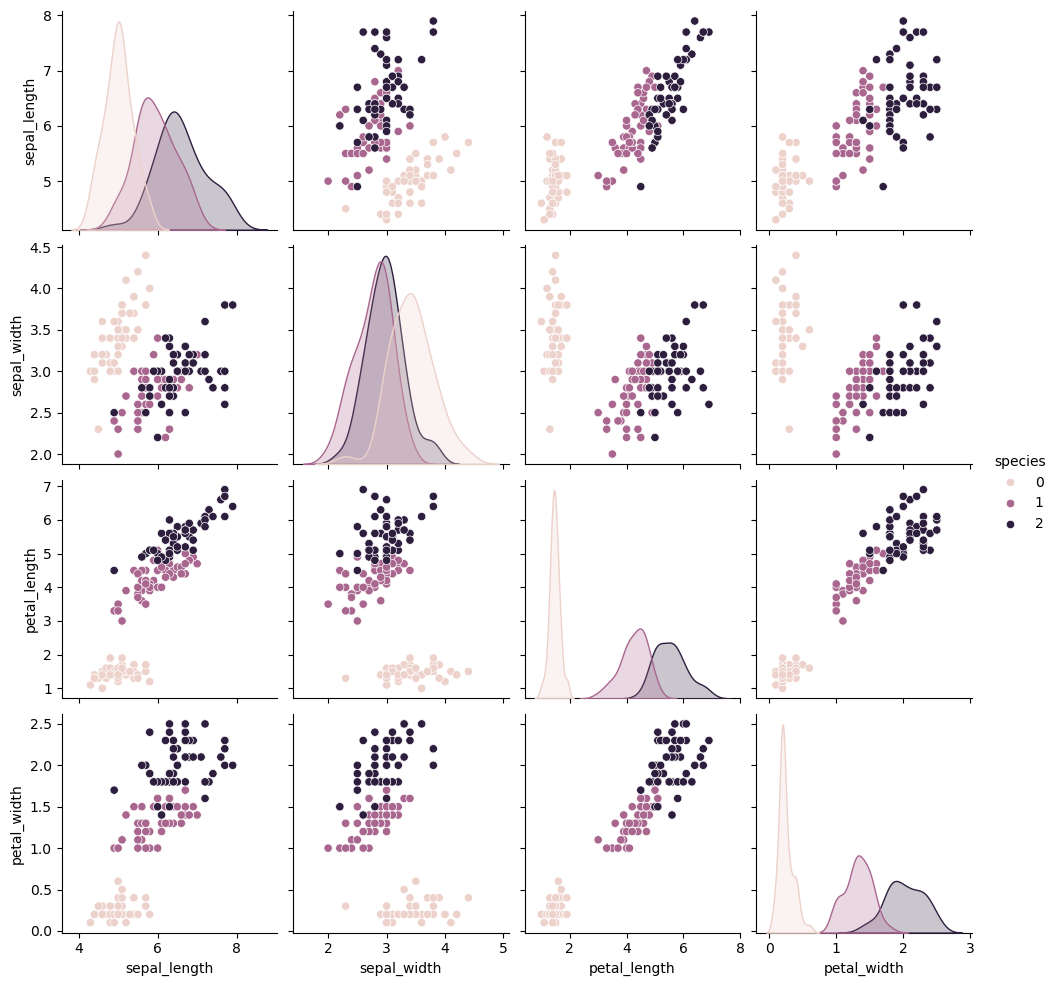

In [10]:
import seaborn as sns
sns.pairplot(df,hue='species')

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

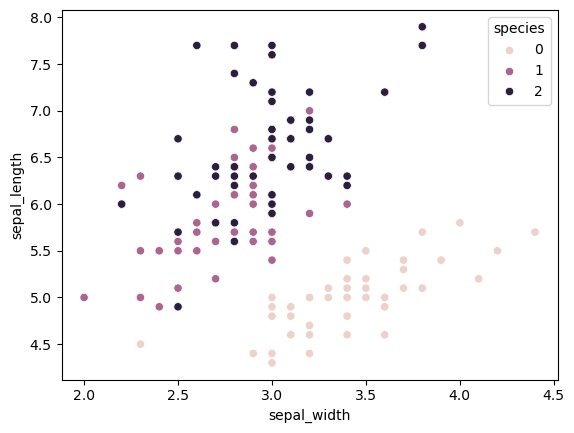

In [11]:
# for practice purpose we are going use  sepal_length vs sepal width and we are also removing species 0
sns.scatterplot(x=df['sepal_width'],y=df['sepal_length'],hue=df['species'])

In [12]:
new_df=df[['sepal_length','sepal_width','species']]

new_df=new_df[df['species']!=0]
new_df.shape

(100, 3)

In [13]:
new_df.species.unique()

array([1, 2])

In [14]:
new_df.head(2)

,sepal_length,sepal_width,species
50,7.0,3.2,1
51,6.4,3.2,1


In [15]:
X=new_df.iloc[:,0:2]
y=new_df.iloc[:,2]

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

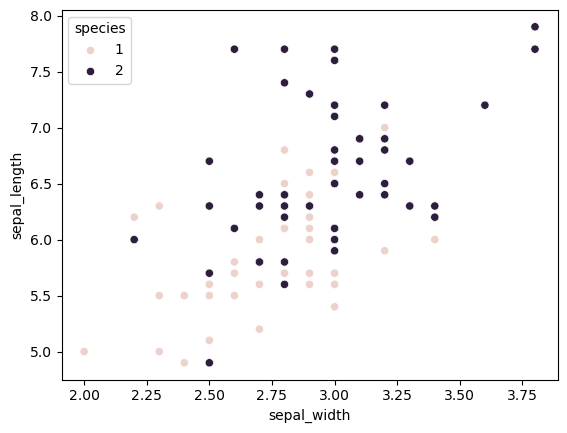

In [16]:
sns.scatterplot(x=new_df['sepal_width'],y=new_df['sepal_length'],hue=new_df['species'])

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()


estimators :list of (str, estimator) tuples


In [18]:
from sklearn.ensemble import VotingClassifier

In [19]:
estimator=[('lr',clf1),('rf',clf2),('knn',clf3)]


we are not splitting the dataset  we are using cross val score by default it uses startified k fold for classification  else k fold 

In [20]:
# individual of each estimator

for est in estimator:
    score=cross_val_score(estimator=est[1],X=X,y=y,cv=10,scoring='accuracy')
    print(est[0] ,score.mean())



lr 0.75
rf 0.6300000000000001
knn 0.62


## hard voting

In [31]:
vc_hard=VotingClassifier(estimators=estimator,voting='hard')
#vc_hard.fit(X,y)
#vc_hard.predict()  if done train test split
score=cross_val_score(estimator=vc_hard,cv=10,X=X,y=y,scoring='accuracy')
print(np.round(np.mean(score),4))




0.67


soft voting

In [32]:
vc_hard=VotingClassifier(estimators=estimator,voting='soft')
#vc_hard.fit(X,y)
#vc_hard.predict()  if done train test split
score=cross_val_score(estimator=vc_hard,cv=10,X=X,y=y,scoring='accuracy')
print(np.round(np.mean(score),4))

0.64


## weighted voting
when we want to give more weight to a model compared to another 

In [37]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimator,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))

for i=1,j=1,k=1 0.64
for i=1,j=1,k=2 0.65
for i=1,j=1,k=3 0.66
for i=1,j=2,k=1 0.63
for i=1,j=2,k=2 0.63
for i=1,j=2,k=3 0.63
for i=1,j=3,k=1 0.62
for i=1,j=3,k=2 0.61
for i=1,j=3,k=3 0.64
for i=2,j=1,k=1 0.68
for i=2,j=1,k=2 0.65
for i=2,j=1,k=3 0.67
for i=2,j=2,k=1 0.65
for i=2,j=2,k=2 0.64
for i=2,j=2,k=3 0.66
for i=2,j=3,k=1 0.61
for i=2,j=3,k=2 0.64
for i=2,j=3,k=3 0.64
for i=3,j=1,k=1 0.7
for i=3,j=1,k=2 0.69
for i=3,j=1,k=3 0.7
for i=3,j=2,k=1 0.66
for i=3,j=2,k=2 0.69
for i=3,j=2,k=3 0.65
for i=3,j=3,k=1 0.63
for i=3,j=3,k=2 0.65
for i=3,j=3,k=3 0.66


## classifier with  same algorithm, different settings

In [38]:
from sklearn.svm import SVC


In [39]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


so we can conclude svm with degree 3 give the best output

In [40]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93
